# K Nearest Neighbors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
import sklearn.model_selection._search

# Data Preparation

In [3]:
iris = sns.load_dataset('iris')
# shuffle the dataset
iris = iris.sample(frac=1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
122,7.7,2.8,6.7,2.0,virginica
119,6.0,2.2,5.0,1.5,virginica
92,5.8,2.6,4.0,1.2,versicolor
45,4.8,3.0,1.4,0.3,setosa
80,5.5,2.4,3.8,1.1,versicolor


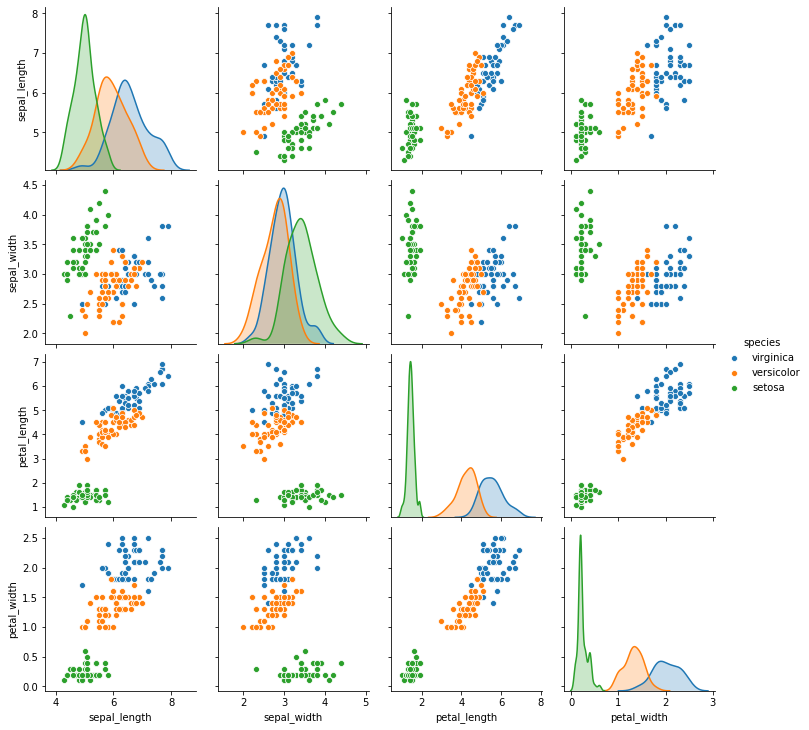

In [4]:
sns.pairplot(iris, hue='species');

In [5]:
features = iris.columns[:-1]

X = iris.drop(columns='species').values
y = iris['species'].values

print('Features:', list(features))
print()
print(X[:5])
print()
print(y[:5])

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

[[7.7 2.8 6.7 2. ]
 [6.  2.2 5.  1.5]
 [5.8 2.6 4.  1.2]
 [4.8 3.  1.4 0.3]
 [5.5 2.4 3.8 1.1]]

['virginica' 'virginica' 'versicolor' 'setosa' 'versicolor']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print()
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)


X_train: (112, 4)
X_test: (38, 4)

y_train: (112,)
y_test: (38,)


# Distance metrics

Minkowski distance is a metric that measures the distance between two n-dimensional points.

For $\vec{x} = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n\end{pmatrix} $ and $\vec{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n\end{pmatrix}$ the Minkowski distance of order $p \ge 1$  for $\vec{x}$ and $\vec{y}$ is given by:

$$
D(\vec{x}, \vec{y}) = \bigg(\sum_{i=1}^n|x_i - y_i|^p\bigg)^{1/p}
$$

Minkowski distance is a generalization of Manhattan ($p=1$) and Euclidean ($p=2$) distances.

In [7]:
# Find the distance between the given instance
# and all points in the training set
instance = X_test[0]
target = y_test[0]

print(instance, '\t', target)

[6.4 2.8 5.6 2.2] 	 virginica


In [8]:
# minkowski distances for p = 1, 2, 3
dist1 = (np.abs(X_train - instance) ** 1).sum(axis=1) ** (1/1)
dist2 = (np.abs(X_train - instance) ** 2).sum(axis=1) ** (1/2)
dist3 = (np.abs(X_train - instance) ** 3).sum(axis=1) ** (1/3)

print('p = 1:', dist1[:5])
print()
print('p = 2:', dist2[:5])
print()
print('p = 3:', dist3[:5])

p = 1: [4.2 1.1 3.4 3.4 3.8]

p = 2: [2.32808935 0.67082039 2.06397674 1.93390796 2.12602916]

p = 3: [1.99632659 0.61534495 1.83015058 1.66599084 1.82755943]


# The Closest K points

In [10]:
k = 5

dist1_sorted_indx = dist1.argsort()
dist2_sorted_indx = dist2.argsort()
dist3_sorted_indx = dist3.argsort()

closest_k1 = dist1_sorted_indx[:k]
closest_k2 = dist2_sorted_indx[:k]
closest_k3 = dist3_sorted_indx[:k]

In [11]:
dist1[dist1_sorted_indx[:5]]

array([0.1, 0.5, 0.7, 0.8, 0.8])

In [12]:
print('The closest', k, 'points.\n')
print('p = 1:', closest_k1)
print('p = 2:', closest_k2)
print('p = 3:', closest_k3)

The closest 5 points.

p = 1: [  7 106  61  27  13]
p = 2: [  7 106  61  27  87]
p = 3: [  7 106  61  87  27]


In [13]:
print('The classes of the closest', k, 'points.\n')
print(y_train[closest_k1])
print(y_train[closest_k2])
print(y_train[closest_k3])

The classes of the closest 5 points.

['virginica' 'virginica' 'virginica' 'virginica' 'virginica']
['virginica' 'virginica' 'virginica' 'virginica' 'virginica']
['virginica' 'virginica' 'virginica' 'virginica' 'virginica']


# Encoding the labels

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
labeler = LabelEncoder()
labeler.fit(y_train)
for label, code in zip(labeler.classes_, range(3)):
    print(f'{label:12}{code}')

setosa      0
versicolor  1
virginica   2


In [16]:
# transform the targets to their encoding
y_train = labeler.transform(y_train)
y_test = labeler.transform(y_test)

In [17]:
y_test

array([2, 1, 2, 1, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 2, 0, 2, 0,
       0, 0, 0, 1, 1, 0, 2, 2, 1, 0, 2, 2, 0, 1, 0, 0])

In [18]:
y_train[closest_k1]

array([2, 2, 2, 2, 2])

In [19]:
y_train[dist1_sorted_indx[:10]]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
from scipy.stats import mode

In [21]:
labeler.inverse_transform(mode(y_train[closest_k1]).mode)

array(['virginica'], dtype=object)

# Batch predictions

In [22]:
X_test.shape, y_test.shape

((38, 4), (38,))

In [23]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [24]:
p = 2

# Every train instance - every test instance
dist2 = (np.abs(X_train - X_test[:,np.newaxis,:]) ** p).sum(axis=2)
# each row is an instance from X_test 
# each column is the distance from the instance 
# in X_test to each instance from X_train
dist2.shape

(38, 112)

In [25]:
# sort each row
dist2_indx = dist2.argsort()
dist2_indx

array([[  7, 106,  61, ...,  83,  29,  58],
       [ 88,  23,  41, ...,  83,  29,  58],
       [  7,  13,  61, ...,  83,  29,  58],
       ...,
       [ 46,   3, 111, ...,  29,  58,  22],
       [ 77,  45,  42, ...,  21,  15,  22],
       [ 39,   5, 108, ...,  21,  15,  22]])

In [26]:
# the classes of the closest 5 points
closest5 = y_train[dist2_indx][:,:5]
closest5

array([[2, 2, 2, 2, 2],
       [1, 1, 1, 2, 2],
       [2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2],
       [2, 2, 2, 2, 1],
       [0, 0, 0, 0, 0],
       [2, 2, 2, 2, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [1, 1, 2, 2, 2],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [27]:
preds = labeler.inverse_transform(mode(closest5, axis=1).mode.ravel())
preds

array(['virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'setosa', 'versicolor',
       'setosa', 'virginica', 'virginica', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'setosa'], dtype=object)

In [28]:
y_test = labeler.inverse_transform(y_test)
y_test

array(['virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'setosa', 'versicolor',
       'setosa', 'virginica', 'virginica', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'virginica', 'versicolor',
       'setosa', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'setosa'], dtype=object)

In [36]:
y_train = labeler.inverse_transform(y_train)

array(['versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'virginica', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'virginica', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'virginica', 'virginica', 'setosa',
       'setosa', 'versicolor', 'setosa', 'virginica', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'versicol

In [29]:
(preds == y_test).mean()

0.9736842105263158

In [30]:
y_test

array(['virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'setosa', 'versicolor',
       'setosa', 'virginica', 'virginica', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'virginica', 'versicolor',
       'setosa', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'setosa'], dtype=object)

In [37]:
from knn import KNNClassifier

In [38]:
knn = KNNClassifier()

knn.fit(X_train, y_train)

preds = knn.predict(X_test)
preds = preds.flatten()
preds

array(['virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'setosa', 'versicolor',
       'setosa', 'virginica', 'virginica', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'setosa'], dtype=object)

In [41]:
(y_test == preds).mean()

0.9736842105263158